In [1]:
import numpy as np 
import pandas as pd
#import scikit-learn as sklearn 
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('bmh')
sns.set_style({'axes.grid': False})
%matplotlib inline

import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode 
import plotly.graph_objs as go 
init_notebook_mode(connected = True)

import warnings as wrn 
wrn.filterwarnings('ignore', category = DeprecationWarning)
wrn.filterwarnings('ignore', category = FutureWarning)
wrn.filterwarnings('ignore', category = UserWarning)

In [3]:
df_train = pd.read_csv("train.csv", keep_default_na = False)
df_test = pd.read_csv("test.csv", keep_default_na = False)

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,...,144,0,NA,NA,NA,0,1,2010,WD,Normal


In [6]:
# Dimensions of train and test data
print("Dimensions of train data:", df_train.shape)
print("Dimensions of test data:", df_test.shape)

Dimensions of train data: (1460, 81)
Dimensions of test data: (1459, 80)


In [7]:
# Check column names
df_train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [8]:
# Extract target column from training data:
Y = df_train[["SalePrice"]]
# Extract training data:
X = df_train.drop("SalePrice", axis = 1)
# Drop immutable features (features that can't be changed):
X = X.drop(["Id", "YearBuilt"], axis = 1)


In [9]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
1,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,0,NA,NA,NA,0,5,2007,WD,Normal
2,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,9,2008,WD,Normal
3,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,NA,NA,NA,0,2,2006,WD,Abnorml
4,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,0,NA,NA,NA,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62,7917,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,8,2007,WD,Normal
1456,20,RL,85,13175,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,MnPrv,NA,0,2,2010,WD,Normal
1457,70,RL,66,9042,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68,9717,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,4,2010,WD,Normal


## Data Preprocessing and Preparation

In [10]:
categorical_NA = ["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual", "TotRmsAbvGrd",  "Functional", "GarageCars", "SaleType", "MSZoning", "Utilities", "Exterior1st", "Exterior2nd", "MasVnrType", "Electrical"]
categorical_no_NA = ["3SsnPorch", "PoolQC", "Fence", "MiscFeature", "MoSold", "YrSold", "SaleCondition", "MSSubClass", "Street", "Alley", "LotShape", "LandContour", "LotConfig", "LandSlope", "BldgType", "HouseStyle", "OverallQual", "OverallCond", "Condition2", "Neighborhood", "Condition1", "RoofStyle", "RoofMatl", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "Heating", "HeatingQC", "CentralAir", "PavedDrive", "FireplaceQu", "GarageType", "BsmtFinType2", "GarageCond", "GarageQual", "Fireplaces", "GarageFinish"]
continuous_NA = ["GarageYrBlt", "GarageArea", "LotFrontage", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "TotalBsmtSF"]
continuous_no_NA = ["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "ScreenPorch", "PoolArea", "MiscVal", "LotArea", "BsmtUnfSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "YearRemodAdd"]

all_columns = categorical_NA + categorical_no_NA + continuous_NA + continuous_no_NA

In [11]:
print(set(all_columns) - set(X.columns))

set()


This verifies that our training data has all the columns as specified in data_description.txt

In [12]:
convert_nan_imputer = SimpleImputer(missing_values = "NA", strategy = "constant", fill_value = np.nan)
most_frequent_imputer = SimpleImputer(missing_values=np.nan, strategy = "most_frequent")
mean_imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
ordinal_encoder = OrdinalEncoder()


In [13]:
categorical_NA_pipeline = Pipeline(steps= [
    ("convert_into_NaN", convert_nan_imputer),
    ("impute_missing_values", most_frequent_imputer),
    ("encode", ordinal_encoder)
])

In [14]:
categorical_pipeline = Pipeline(
    steps = [
        ("encoder", ordinal_encoder)
    ]
)

In [15]:
continuous_NA_pipeline = Pipeline(
    steps = [
        ("convert_into_NaN", convert_nan_imputer),
        ("impute_missing_values", mean_imputer),
        ("standardizer", StandardScaler())
    ]
)

In [16]:
continuous_pipeline = Pipeline(
    steps = [
        ("standardizer", StandardScaler())
    ]
)

In [17]:
preprocessor = ColumnTransformer(
    transformers = [
        ("categorical_NA", categorical_NA_pipeline, categorical_NA),
        ("categorical_no_NA", categorical_pipeline, categorical_no_NA),
        ("continuous_NA", continuous_NA_pipeline, continuous_NA),
        ("continuous_no_NA", continuous_pipeline, continuous_no_NA)
    ],
    remainder = "passthrough"
)

In [18]:
# Change order of columns of X, since ColumnTransformer will spit out result in the order we give it
X = X[all_columns].copy()
preprocessed_X = preprocessor.fit_transform(X)

In [19]:
preprocessed_X

array([[ 1.        ,  0.        ,  2.        , ..., -0.12024172,
         0.37033344,  0.87866809],
       [ 0.        ,  1.        ,  2.        , ..., -0.12024172,
        -0.48251191, -0.42957697],
       [ 1.        ,  0.        ,  2.        , ..., -0.12024172,
         0.51501256,  0.83021457],
       ...,
       [ 0.        ,  0.        ,  2.        , ..., -0.12024172,
         1.56964722,  1.02402865],
       [ 1.        ,  0.        ,  1.        , ..., -0.12024172,
        -0.83278768,  0.53949344],
       [ 1.        ,  0.        ,  1.        , ..., -0.12024172,
        -0.49393395, -0.96256569]])

## Converting target feature vector Y to binary (using median as a threshold)

In [20]:
Y.median()

SalePrice    163000.0
dtype: float64

In [21]:
Y_cat = (Y > Y.median()).astype('int')

In [22]:
Y_cat.head()

,SalePrice
0,1
1,1
2,1
3,0
4,1


## Check distribution of dependent variable (Y):

<AxesSubplot:ylabel='Density'>

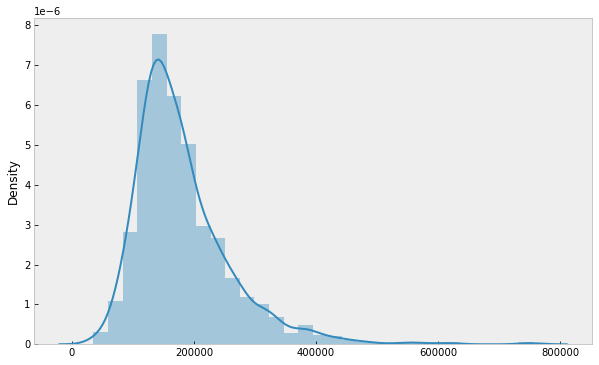

In [23]:
plt.figure(figsize = (10,6))
sns.distplot(Y, bins=30)

Normality assumption of target variable is satisfied. Distribution is right skewed with potentially some outlier to the right

## Determine any correlations between:
(i) Independent variables themselves

(ii) Independent variables and dependent variable

<AxesSubplot:>

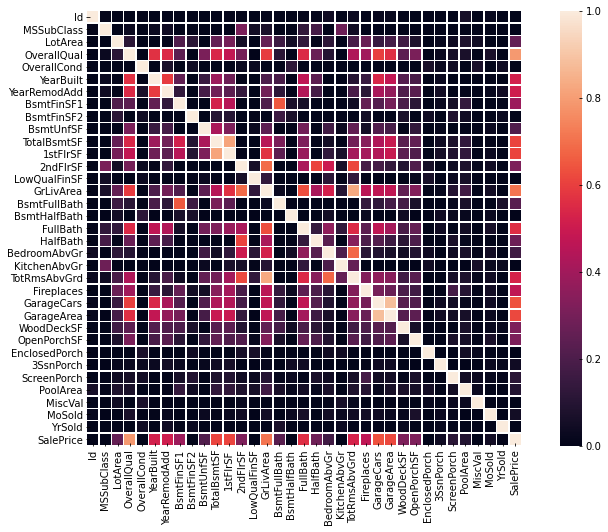

In [24]:
plt.figure(figsize = (14,8))
corr_matrix = df_train.corr().round(2)
sns.heatmap(data=corr_matrix, linewidths=0.5, vmin = 0, vmax = 1, square = True)

A few significant correlations between independent variables, such as:
- TotalBsmtSF and 1stFlrSF
- GrLivArea and TotRmsAbvGrd
- GarageCars and GarageArea

A few significant correlations between dependent variable and independent variables, such as:
- SalePrice and OverallQual
- SalePrice and TotalBsmtSF
- SalePrice and 1stFlrSF
- SalePrice and GrLivArea
- SalePrice and GarageCars
- SalePrice and GarageArea

Text(0, 0.5, 'SalePrice')

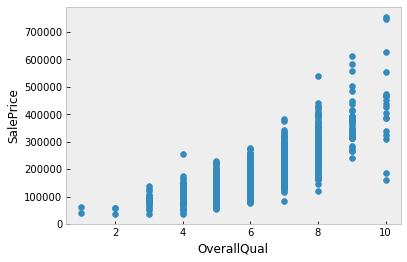

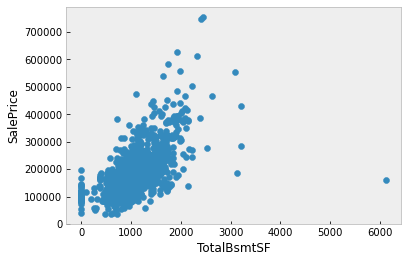

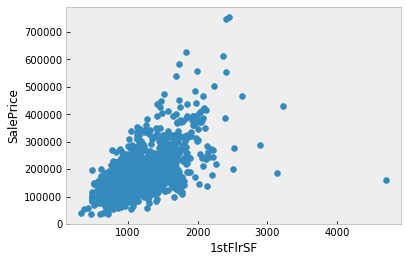

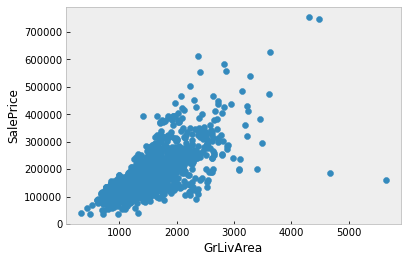

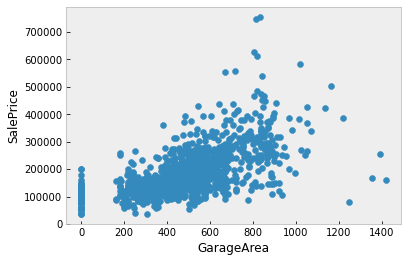

In [25]:
# Scatter plot to observe the correlations between features highly correlated with SalePrice:

plot1 = plt.figure(1)
plt.scatter(df_train['OverallQual'], Y)
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")

# As OverallQual goes up, SalePrice tends to go up
plot2 = plt.figure(2)
plt.scatter(df_train['TotalBsmtSF'], Y)
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")

# As TotalBsmtSF goes up, SalePrice tends to go up
plot3 = plt.figure(3)
plt.scatter(df_train['1stFlrSF'], Y)
plt.xlabel("1stFlrSF")
plt.ylabel("SalePrice")

# As 1stFlrSF goes up, SalePrice tends to go up

plot4 = plt.figure(4)
plt.scatter(df_train['GrLivArea'], Y)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")


# As GrLivArea goes up, SalePrice tends to go up

plot5 = plt.figure(5)
plt.scatter(df_train['GarageArea'], Y)
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(preprocessed_X, Y_cat, test_size = 0.3, random_state = 32)

In [27]:
X.head()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageCars,...,ScreenPorch,PoolArea,MiscVal,LotArea,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,YearRemodAdd
0,1,0,2,1,3,1,Gd,8,Typ,2,...,0,0,0,8450,150,856,854,0,1710,2003
1,0,1,2,0,3,1,TA,6,Typ,2,...,0,0,0,9600,284,1262,0,0,1262,1976
2,1,0,2,1,3,1,Gd,6,Typ,2,...,0,0,0,11250,434,920,866,0,1786,2002
3,1,0,1,0,3,1,Gd,7,Typ,3,...,0,0,0,9550,540,961,756,0,1717,1970
4,1,0,2,1,4,1,Gd,9,Typ,3,...,0,0,0,14260,490,1145,1053,0,2198,2000


In [28]:
rf_classifier = RandomForestClassifier(oob_score = True)

In [29]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(oob_score=True)

In [30]:
rf_classifier.score(X_test, Y_test)

0.9155251141552512

In [31]:
preprocessed_X.shape

(1460, 78)

In [32]:
rf_classifier.oob_score_

0.9217221135029354

# Hyperparameter Tuning

In [33]:
n_estimators = [int(x) for x in range(100, 700, 100)] # This is how many decision trees to generate
max_features = [0.2, 0.4, 0.6, 0.8, 1]
max_samples = [0.2, 0.4, 0.6, 0.8, 1]
criterion = ['gini', 'entropy']
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {"n_estimators": n_estimators,
"max_features": max_features,
"max_samples": max_samples,
"criterion": criterion,
"min_samples_leaf": min_samples_leaf,
"bootstrap": bootstrap}


In [34]:
#rf_grid = GridSearchCV(estimator = rf_classifier, param_grid=random_grid, cv = 10, verbose = 2)
#rf_grid.fit(X_train, Y_train)
#rf.grid.best_params_

In [35]:
rf_random = RandomizedSearchCV(estimator=rf_classifier, param_distributions=random_grid, cv = 3, verbose=2, random_state=42, n_jobs=None)
rf_random.fit(X_train, Y_train)
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=500, min_samples_leaf=2, max_samples=0.6, max_features=0.6, criterion=gini, bootstrap=False 
[CV]  n_estimators=500, min_samples_leaf=2, max_samples=0.6, max_features=0.6, criterion=gini, bootstrap=False, total=   0.0s
[CV] n_estimators=500, min_samples_leaf=2, max_samples=0.6, max_features=0.6, criterion=gini, bootstrap=False 
[CV]  n_estimators=500, min_samples_leaf=2, max_samples=0.6, max_features=0.6, criterion=gini, bootstrap=False, total=   0.0s
[CV] n_estimators=500, min_samples_leaf=2, max_samples=0.6, max_features=0.6, criterion=gini, bootstrap=False 
[CV]  n_estimators=500, min_samples_leaf=2, max_samples=0.6, max_features=0.6, criterion=gini, bootstrap=False, total=   0.0s
[CV] n_estimators=200, min_samples_leaf=1, max_samples=0.4, max_features=0.4, criterion=entropy, bootstrap=False 
[CV]  n_estimators=200, min_samples_leaf=1, max_samples=0.4, max_features=0.4, criterion=entropy, bootstrap=False,

{'n_estimators': 300,
 'min_samples_leaf': 4,
 'max_samples': 0.6,
 'max_features': 1,
 'criterion': 'entropy',
 'bootstrap': True}

In [36]:
rf_random.best_score_

0.9119285837502157

In [37]:
rf_classifier = RandomForestClassifier(**rf_random.best_params_, oob_score=True)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_features=1, max_samples=0.6,
                       min_samples_leaf=4, n_estimators=300, oob_score=True)

In [38]:
print("Final Score: {}".format(rf_classifier.score(X_test, Y_test)))
print("Final out of bag score: {}".format(rf_classifier.oob_score_))

Final Score: 0.91324200913242
Final out of bag score: 0.9256360078277887


### Max depth of Random Forest Classifier

In [39]:
tree_max_depths = [estimator.tree_.max_depth for estimator in rf_classifier.estimators_]
rf_max_depths = np.mean(tree_max_depths)

In [40]:
rf_max_depths

9.236666666666666

In [41]:
y_pred = rf_classifier.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[200,  20],
       [ 18, 200]], dtype=int64)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       220
           1       0.91      0.92      0.91       218

    accuracy                           0.91       438
   macro avg       0.91      0.91      0.91       438
weighted avg       0.91      0.91      0.91       438



# Feature Importance

Here I am using permutation importance, since it is not sensible to the relationship between the feature and the target (i.e if a feature is 90% responsible for classification of 5% of the variables it still may not be a significantly important feature), thus the drop in model score is indicative of how much the model depends on the feature

In [44]:
rf_classifier.score(X_test, Y_test)

0.91324200913242

In [45]:
from sklearn.inspection import permutation_importance
results = permutation_importance(rf_classifier, X_test, Y_test, scoring = "accuracy", n_repeats = 100, random_state = 32)

In [46]:
# Verify function gives mean importance for all features
len(results.importances_mean)
importance = results.importances_mean

In [47]:
from libraries.helpers import imp_df

In [51]:
from libraries.helpers import var_imp_plot

ImportError: cannot import name 'var_imp_plot' from 'libraries.helpers' (c:\Users\vta\housing\housing\libraries\helpers.py)

In [49]:
imp_df = imp_df(X.columns, importance)

In [50]:
imp_df.head()

,feature,feature_importance
0,GrLivArea,0.005548
1,Functional,0.004132
2,FullBath,0.003744
3,GarageType,0.003379
4,YearRemodAdd,0.003333
